<a href="https://colab.research.google.com/github/srimoyeeegangz/ML-lab-codes/blob/main/13)_customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
updated_customer=files.upload()


Saving Mall_Customers.csv to Mall_Customers (1).csv


In [ ]:
import pandas as pd

df = pd.read_csv('Mall_Customers.csv')
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [ ]:
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [ ]:
print(df.dtypes)

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


In [ ]:

categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols)


df_encoded = pd.get_dummies(df, columns=categorical_cols)
print(df_encoded.head())


Categorical columns: Index(['Gender'], dtype='object')
   CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  Gender_Female  \
0           1   19                  15                      39          False   
1           2   21                  15                      81          False   
2           3   20                  16                       6           True   
3           4   23                  16                      77           True   
4           5   31                  17                      40           True   

   Gender_Male  
0         True  
1         True  
2        False  
3        False  
4        False  


In [ ]:
X = df_encoded[['Annual Income (k$)', 'Spending Score (1-100)']]


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
from sklearn.cluster import KMeans

kmeans_euclidean = KMeans(n_clusters=5, random_state=42)
kmeans_euclidean.fit(X_scaled)
labels_euclidean = kmeans_euclidean.labels_


In [ ]:
!pip install pyclustering

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 31.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395100 sha256=d404f15f4065b18c42fc8979e66bb9ab3774d0214043a5d52220f33ff1b15227
  Stored in directory: /root/.cache/pip/wheels/68/29/b4/131bd7deec3663cc311ab9aa64d6517c3e3ec24bcadfc32f74
Successfully built pyclustering


In [ ]:


from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils import distance_metric, type_metric
import numpy as np

# Convert your scaled data to list for pyclustering
data = X_scaled.tolist()

# Initialize medoids indices (choose intelligently or random)
initial_medoids = [0, 1, 2, 3, 4]  # example indices of initial medoids

# Define manhattan distance metric
manhattan_metric = distance_metric(type_metric.MANHATTAN)

# Create the kmedoids instance with Manhattan metric
kmedoids_instance = kmedoids(data, initial_medoids, metric=manhattan_metric)

# Run clustering process
kmedoids_instance.process()

# Get clusters and medoids
clusters = kmedoids_instance.get_clusters()
medoids = kmedoids_instance.get_medoids()

print("Clusters:", clusters)
print("Medoids:", medoids)


Clusters: [[42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122], [123, 125, 127, 129, 131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 155, 157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181, 183, 185, 187, 189, 191, 193, 195, 197, 199], [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 44], [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41], [124, 126, 128, 130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154, 156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180, 182, 184, 186, 188, 190, 192, 194, 196, 198]]
Medoids: [80, 161, 24, 13, 154]


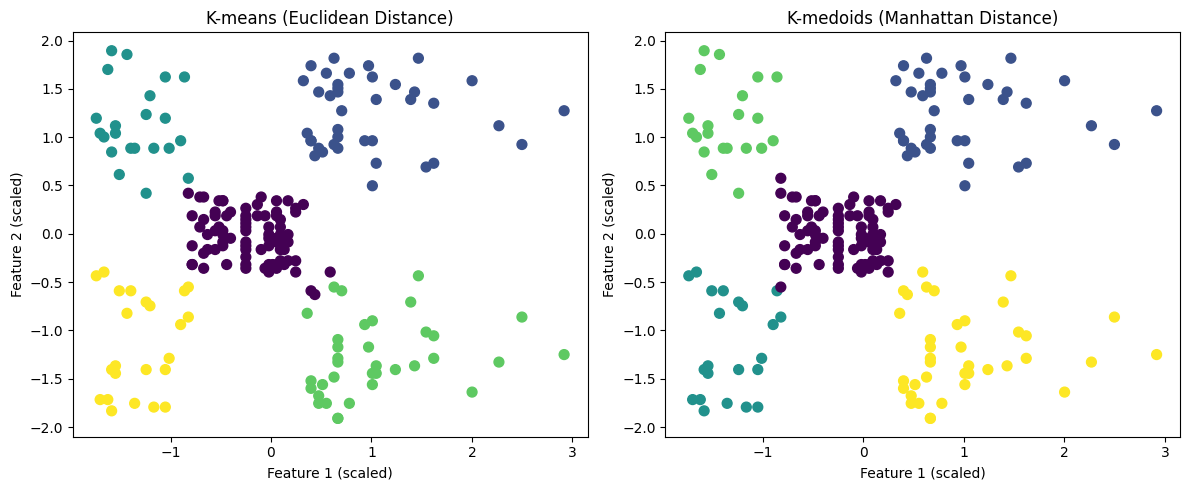

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Convert pyclustering clusters to labels array for Manhattan
labels_manhattan = np.zeros(len(X_scaled), dtype=int)
for cluster_idx, cluster_points in enumerate(clusters):
    for point_idx in cluster_points:
        labels_manhattan[point_idx] = cluster_idx

plt.figure(figsize=(12, 5))

# Euclidean clusters (from KMeans)
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_euclidean, cmap='viridis', s=50)
plt.title('K-means (Euclidean Distance)')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')

# Manhattan clusters (from KMedoids with pyclustering)
plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_manhattan, cmap='viridis', s=50)
plt.title('K-medoids (Manhattan Distance)')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler

# Select 3 features for 3D plotting
X_3d = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Scale the features
scaler = StandardScaler()
X_3d_scaled = scaler.fit_transform(X_3d)


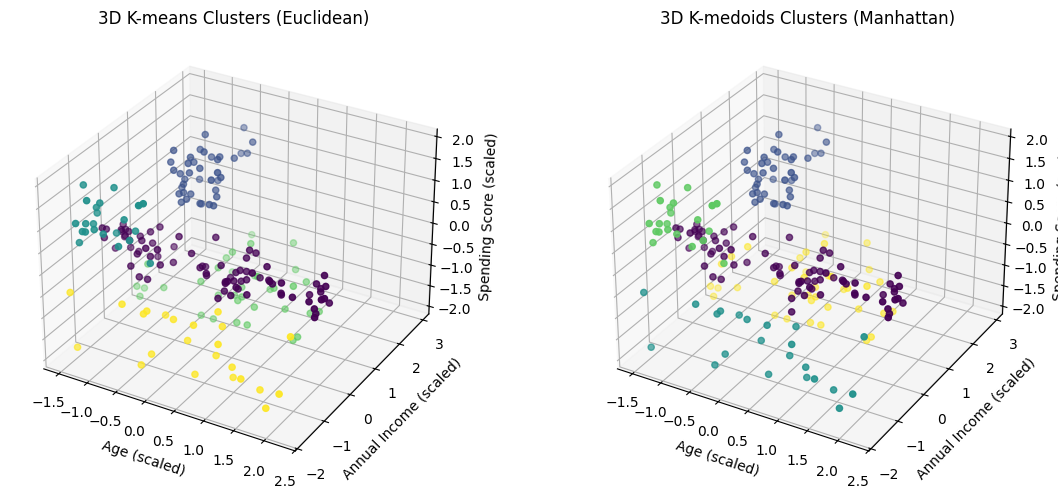

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Convert pyclustering clusters to labels array for Manhattan
labels_manhattan = np.zeros(len(X_3d_scaled), dtype=int)
for cluster_idx, cluster_points in enumerate(clusters):
    for point_idx in cluster_points:
        labels_manhattan[point_idx] = cluster_idx

fig = plt.figure(figsize=(12, 5))

# Euclidean (KMeans) plot
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X_3d_scaled[:,0], X_3d_scaled[:,1], X_3d_scaled[:,2], c=labels_euclidean, cmap='viridis')
ax1.set_title('3D K-means Clusters (Euclidean)')
ax1.set_xlabel('Age (scaled)')
ax1.set_ylabel('Annual Income (scaled)')
ax1.set_zlabel('Spending Score (scaled)')

# Manhattan (KMedoids) plot
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X_3d_scaled[:,0], X_3d_scaled[:,1], X_3d_scaled[:,2], c=labels_manhattan, cmap='viridis')
ax2.set_title('3D K-medoids Clusters (Manhattan)')
ax2.set_xlabel('Age (scaled)')
ax2.set_ylabel('Annual Income (scaled)')
ax2.set_zlabel('Spending Score (scaled)')

plt.tight_layout()
plt.show()
